In [3]:
import pandas as pd

# Read the CSV file with ISO-8859-1 encoding
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# Assuming you have already loaded your dataset into a DataFrame named df

# Remove the last three columns
df = df.iloc[:, :-3]

# Check the updated dataframe
print(df.head())


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
print("Dimensions:",df.shape)

Dimensions: (5572, 2)


In [7]:
print(df['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


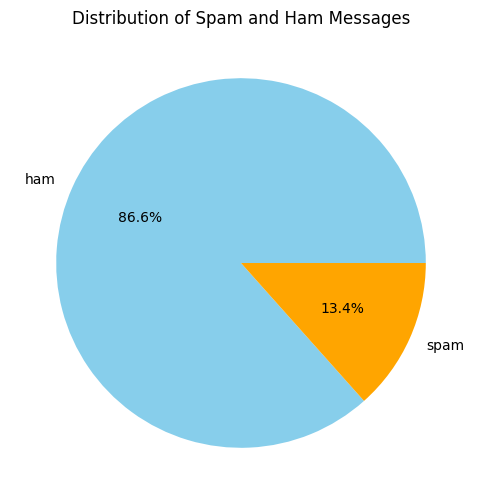

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['v1'].value_counts()

# Plot a pie chart to visualize the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Spam and Ham Messages')
plt.show()


In [9]:
print(df.describe())

          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [11]:
x = df['v2']
y = df['v1']

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(x)

# Get the feature names (words or n-grams)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

# Print feature names
print("\nFeature Names:")
print(feature_names)


TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Feature Names:
['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [26]:


# Count the occurrences of each label in column 'v1'
label_counts = df['v1'].value_counts()

# Display the counts
print("Label Counts:")
print(label_counts)


Label Counts:
v1
0    4825
1     747
Name: count, dtype: int64


In [31]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Define the desired number of samples for each class
desired_samples = {'ham': 4000, 'spam': 4000}

# Initialize RandomUnderSampler and RandomOverSampler with the desired sampling strategy
rus = RandomUnderSampler(sampling_strategy='auto')
ros = RandomOverSampler(sampling_strategy=desired_samples)

# Perform under-sampling and over-sampling to balance the classes
X_resampled_under, y_resampled_under = rus.fit_resample(X, y)
X_resampled, y_resampled = ros.fit_resample(X_resampled_under, y_resampled_under)

# Combine the resampled features and labels into a new balanced dataset
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='v1')], axis=1)
label_mapping = {'ham': 0, 'spam': 1}

# Apply the mapping function to convert text values to numerical values in column 'v1'
df['v1'] = df['v1'].map(label_mapping)
# Display the balanced dataset
print("Balanced DataFrame:")
print(balanced_df)

# Display class counts after balancing
print("Class Counts after Balancing:")
print(balanced_df['v1'].value_counts())


Balanced DataFrame:
                                                     v2    v1
0     Lemme know when I can swing by and pick up, I'...   ham
1     Sorry I flaked last night, shit's seriously go...   ham
2     You have registered Sinco as Payee. Log in at ...   ham
3            You still around? Looking to pick up later   ham
4     Do you know why god created gap between your f...   ham
...                                                 ...   ...
7995  Thanks for your ringtone order, reference numb...  spam
7996  We tried to contact you re your reply to our o...  spam
7997  Congrats! 2 mobile 3G Videophones R yours. cal...  spam
7998  Final Chance! Claim ur å£150 worth of discount...  spam
7999  You are a winner U have been specially selecte...  spam

[8000 rows x 2 columns]
Class Counts after Balancing:
v1
ham     4000
spam    4000
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11092\3240354457.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1'] = df['v1'].map(label_mapping)


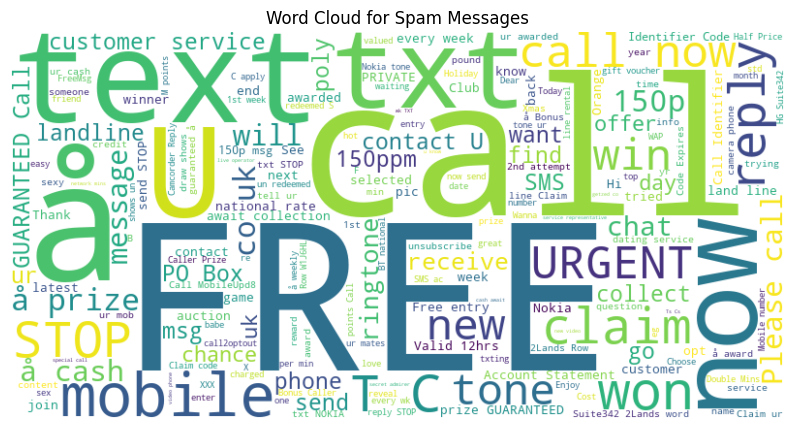

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter spam messages
spam_messages = df[df['v1'] == 'spam']['v2']

# Concatenate all spam messages into a single text string
spam_text = ' '.join(spam_messages)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(spam_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()


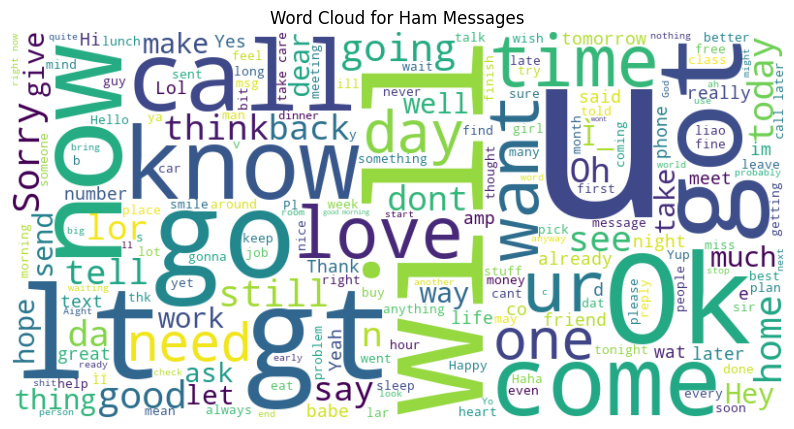

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter ham messages
ham_messages = df[df['v1'] == 'ham']['v2']

# Concatenate all ham messages into a single text string
ham_text = ' '.join(ham_messages)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(ham_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predict on the testing data
y_pred = nb_model.predict(X_test_vec)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report for Multinomial Naive Bayes:")
print(report)


Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [24]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

# Predict on the testing data
y_pred_svm = svm_model.predict(X_test_vec)

# Evaluate the SVM model
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for Support Vector Machine:")
print(report_svm)


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test_vec)

# Evaluate the Random Forest model
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest Classifier:")
print(report_rf)


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99      0.82      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [33]:
y_pred_rf

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype=object)

In [34]:
y_test

3245     ham
944      ham
1044    spam
2484     ham
812     spam
        ... 
4264     ham
2439     ham
5556     ham
4205     ham
4293    spam
Name: v1, Length: 1115, dtype: object